In [2]:
%matplotlib inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import healpy as hp

In [3]:
#Load data, saved as np.savetxt('galaxyCatalog-short.gz',np.column_stack([ra, dec, finalDist,jmag,kmag,rbandMag]),delimiter='  ',header='ra, dec, distance[Mpc], jMag, kMag, rMag')
MASSra,MASSdec,finalDist,jmag,kmag,rbandMag=np.loadtxt("galaxyCatalog-short.gz",unpack=True)

In [ ]:
####################### Plots ###############################3333

In [4]:
cool_cmap=cm.jet
cool_cmap.set_under('w')

In [5]:
selec2=((jmag<15)&(finalDist<200)&(finalDist>0))

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


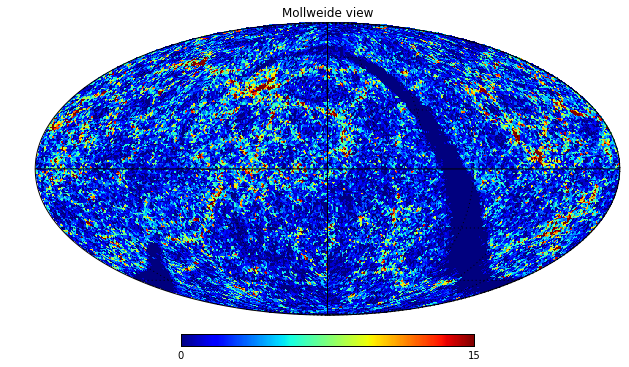

In [6]:
pix=hp.ang2pix(64,MASSra[selec2],MASSdec[selec2],lonlat=True)
nummap=np.zeros(hp.nside2npix(64))
np.add.at(nummap,pix,1)
hp.mollview(nummap,max=15,cmap=cool_cmap)
hp.graticule()
plt.show()

In [7]:
#Calculate absolute J and K magnitude and color
absJmag=100*np.ones(len(MASSra))
absJmag[selec2]=jmag[selec2]-5*np.log10(finalDist[selec2]*10**6)+5
absKmag=100*np.ones(len(MASSra))
absKmag[selec2]=kmag[selec2]-5*np.log10(finalDist[selec2]*10**6)+5
colorJK=100*np.ones(len(MASSra))
colorJK[selec2]=absJmag[selec2]-absKmag[selec2]
colorjk=100*np.ones(len(MASSra))
colorjk[selec2]=jmag[selec2]-kmag[selec2]
#color jk and colorJK are the same of course

In [9]:
#Calculate Mass in solar masses
mass=-1*np.ones(len(MASSra))
mass[selec2]=10**((1.434*colorjk[selec2])-1.380+(0.4*(3.28-absKmag[selec2])))
actual=((mass>0)&(mass<5*10**12))

/Users/KarenPerezSarmiento/Library/Enthought/Canopy_32bit/User/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


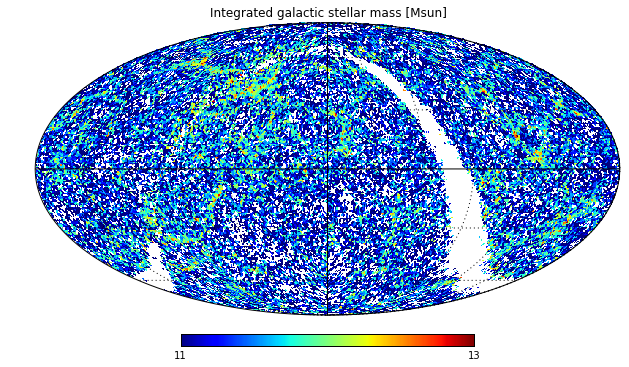

In [10]:
#plot mass map
pixm=hp.ang2pix(64,MASSra[actual],MASSdec[actual],lonlat=True)
massmap=np.zeros(hp.nside2npix(64))
np.add.at(massmap,pixm,mass[actual])
finalMp=hp.mollview(np.log10(massmap),title='Integrated galactic stellar mass [Msun]',min=11,max=13,cmap=cool_cmap,return_projected_map=True)
hp.graticule()
plt.show()

In [11]:
#Stellar masses of ultra-faint dwarf galaxies with high resolution spectroscopy analysis.

HorI=2.4*10**3;
BooI=29*10**3;
BooII=10**3;
RetII=2.6*10**3;
ComBer=3.7*10**3;
CVnII=7.9*10**3;
Her=37*10**3;
Segue1=0.34*10**3;
Segue2=0.86*10**3;
UMaII=4*10**3;
LeoIV=19*10**3;
TucII=3*10**3;
TucIII=0.8*10**3;
mass13=HorI+BooI+BooII+RetII+ComBer+CVnII+Her+Segue1+Segue2+UMaII+LeoIV+TucII+TucIII;
mass13

111600.0

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


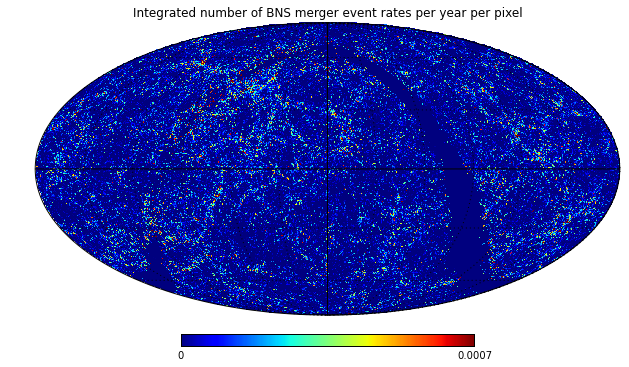

In [12]:
pixr=hp.ang2pix(128,MASSra[actual],MASSdec[actual],lonlat=True)
massmap=np.zeros(hp.nside2npix(128))
np.add.at(massmap,pixr,mass[actual])
ratemap=massmap*(1/mass13)*(1/((13.82*10**9)-(1.003*10**9)))
rateM=hp.mollview(ratemap,title='Integrated number of BNS merger event rates per year per pixel',max=0.0007,cmap=cool_cmap,return_projected_map=True)
hp.graticule()
plt.show()

In [13]:
hp.write_map('rateMapK128.fits',ratemap)

In [14]:
def rateAtDistMass(A):
    selecA=((jmag<15)&(finalDist<A)&(finalDist>0))
    absJmag=100*np.ones(len(MASSra))
    absJmag[selecA]=jmag[selecA]-5*np.log10(finalDist[selecA]*10**6)+5
    absKmag=100*np.ones(len(MASSra))
    absKmag[selecA]=kmag[selecA]-5*np.log10(finalDist[selecA]*10**6)+5
    colorjk=100*np.ones(len(MASSra))
    colorjk[selecA]=jmag[selecA]-kmag[selecA]
    mass=-1*np.ones(len(MASSra))
    mass[selecA]=10**((1.434*colorjk[selecA])-1.380+(0.4*(3.28-absKmag[selecA])))
    actualA=((mass>0)&(mass<5*10**12))
    pix2=hp.ang2pix(64,MASSra[actualA],MASSdec[actualA],lonlat=True)
    massmap=np.zeros(hp.nside2npix(64))
    np.add.at(massmap,pix2,mass[actualA])
    massAmpc=sum(massmap)
    volumeT=(10**9)
    volumeA=4*np.pi*(A**3)/3
    mass1gyr=massAmpc*volumeT/volumeA
    rateAmpc=massAmpc*(1/mass13)*(1/((13.82*10**9)-(1.003*10**9)))
    rate1gyr=rateAmpc*volumeT/volumeA
    return rateAmpc

In [15]:
catalogRate=[]
for i in range(0,220,20):
    catalogRate=np.append(catalogRate, rateAtDistMass(i))
catalogRate

/Users/KarenPerezSarmiento/Library/Enthought/Canopy_32bit/User/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/Users/KarenPerezSarmiento/Library/Enthought/Canopy_32bit/User/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


array([ 0.        ,  0.01411599,  0.08109434,  0.23852455,  0.64788366,
        1.22554765,  2.05579421,  3.28342768,  4.79447065,  6.70633713,
        8.93970804])